In [46]:
import numpy as np
from numpy.random import randn, uniform
import matplotlib.pyplot as plt
import scipy.linalg as sla

D = 2 # Dimension of the weight space
N_Data_1 = 15 # Number of samples in dataset 1
N_Data_2 = 30 # Number of samples in dataset 2
sigma_w = 2.0
prior_mean = [-5, 0]
prior_precision = np.eye(D) / sigma_w**2
# We summarize distributions using their parameters
prior_par = {'mean': prior_mean, 'precision': prior_precision}
# Here we draw the true underlying w. We do this only once
w_tilde = sigma_w * randn(2) + prior_mean
# Draw the inputs for datasets 1 and 2
X_Data_1 = 0.5 * randn(N_Data_1, D)
X_Data_2 = 0.1 * randn(N_Data_2, D) + 0.5
# Draw the outputs for the datasets
sigma_y = 1.0
y_Data_1 = np.dot(X_Data_1, w_tilde) + sigma_y * randn(N_Data_1)
y_Data_2 = np.dot(X_Data_2, w_tilde) + sigma_y * randn(N_Data_2)
# The complete datasets
Data_1 = {'X': X_Data_1,
          'y': y_Data_1}
Data_2 = {'X': X_Data_2,
          'y': y_Data_2}

In [47]:
def posterior_par(prior_par, Data, sigma_y):
    """Calculate posterior parameters.

    Calculate posterior mean and covariance for given prior mean and
    covariance in the par dictionary, given data and given noise
    standard deviation.
    """
    X = Data['X']
    y = Data['y']
    var_y = sigma_y**2
    w_0 = prior_par['mean']
    K_0 = prior_par['precision']
    K_N = K_0 + 1/var_y*np.transpose(X)@X
    w_N = np.linalg.solve(K_N, K_0)@w_0
    if y.size > 0:
        w_N += 1/var_y*np.linalg.solve(K_N, np.transpose(X))@y
    return {'mean': w_N, 'precision': K_N}

def posterior_par2(prior_par, Data, sigma_y):
    """Calculate posterior parameters.

    Calculate posterior mean and covariance for given prior mean and
    covariance in the par dictionary, given data and given noise
    standard deviation.
    """
    X = Data['X']
    y = Data['y']
    var_y = sigma_y**2
    w_0 = prior_par['mean']
    K_0 = prior_par['precision']
    # The next line corresponds to:
    #  V_N = var_y * inv(var_y * V_0_inv + np.matmul(X.T, X))
    K_N = K_0 + np.matmul(X.T, X) / var_y
    # The next line corresponds to:
    #  w_N = np.dot(V_N, np.dot(V_0_inv, w_0))
    w_N = np.linalg.solve(K_N, np.dot(K_0, w_0))
    if y.size > 0:
        w_N += np.linalg.solve(K_N, np.dot(X.T, y)) / var_y
    return {'mean': w_N, 'precision': K_N}

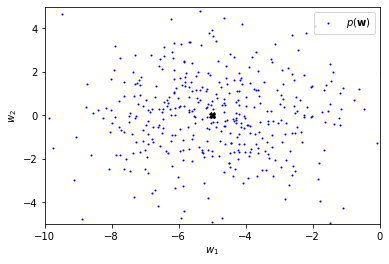

In [48]:
def visualise_par(par, label, colour):
    ''' Visualises a multivariate normal distribution with given mean and
        covariance matrix in the par dictionary.
    '''
    D = len(par['mean'])
    # The next three lines correspond to:
    #  samples = multivariate_normal(par['mean'],
                                    #  inv(par['precision']), 400)
    L = sla.cholesky(par['precision'], lower=True)
    samples = sla.solve_triangular(L, randn(D, 400), trans=1, lower=True).T + par['mean']
    plt.scatter(samples[:, 0], samples[:, 1], s=1, label=label, c=colour)
    plt.plot(par['mean'][0], par['mean'][1], marker='X', c='k')
    plt.xlim([-10,0])
    plt.ylim([-5,5])
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$')

plt.figure(1)
plt.clf()
visualise_par(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
plt.legend()
plt.show()

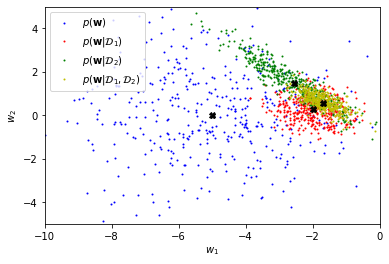

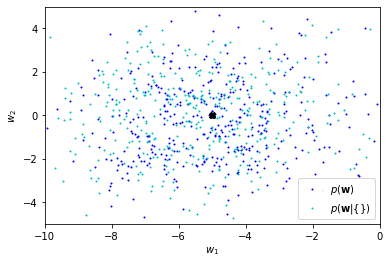

In [49]:
# We combine datasets 1 and 2 by stacking the matrices / vectors
Data_1_2 = {'X': np.vstack((X_Data_1, X_Data_2)),
            'y': np.concatenate((y_Data_1, y_Data_2))}
# Calculate posterior parameters
posterior_par_1 = posterior_par(prior_par, Data_1, sigma_y)
posterior_par_2 = posterior_par(prior_par, Data_2, sigma_y)
posterior_par_1_2 = posterior_par(prior_par, Data_1_2, sigma_y)
# Visualise prior and posterior distributions
plt.figure(2)
plt.clf()
visualise_par(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
visualise_par(posterior_par_1,
              label='$p(\mathbf{w}|\mathcal{D}_1)$',
              colour='r')
visualise_par(posterior_par_2,
              label='$p(\mathbf{w}|\mathcal{D}_2)$',
              colour='g')
visualise_par(posterior_par_1_2,
              label='$p(\mathbf{w}|\mathcal{D}_1,\mathcal{D}_2)$',
              colour='y')
plt.legend()
plt.show()
# Here we construct an empty dataset
Data_nodat = {'X': np.empty([0, D]),
              'y': np.empty([0, 1])}
# The posterior for an empty dataset will be the prior
plt.figure(3)
plt.clf()
posterior_par_nodat = posterior_par(prior_par, Data_nodat, sigma_y)
visualise_par(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
visualise_par(posterior_par_nodat,
              label='$p(\mathbf{w}|\{\})$',
              colour='c')
plt.legend()
plt.show()

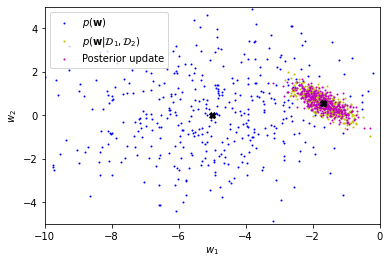

p(w|D_1,D_2):
{'mean': array([-1.69340156,  0.57829316]), 'precision': array([[10.422432  ,  7.76720349],
       [ 7.76720349, 11.13845285]])}
Posterior update:
{'mean': array([-1.69340156,  0.57829316]), 'precision': array([[10.422432  ,  7.76720349],
       [ 7.76720349, 11.13845285]])}


In [50]:
# Update the posterior that we got for Data_1 with Data_2
posterior_par_c = posterior_par(posterior_par_1, Data_2, sigma_y)
# The posterior is the same as the one we got in b)
plt.figure(4)
plt.clf()
visualise_par(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
visualise_par(posterior_par_1_2,
              label='$p(\mathbf{w}|\mathcal{D}_1,\mathcal{D}_2)$',
              colour='y')
visualise_par(posterior_par_c,
              label='Posterior update',
              colour='m')
plt.legend()
plt.show()
print('p(w|D_1,D_2):')
print(posterior_par_1_2)
print('Posterior update:')
print(posterior_par_c)

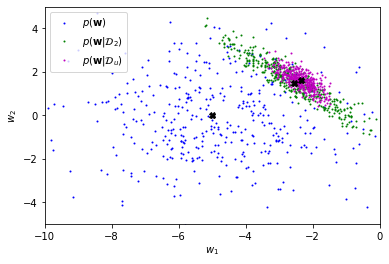

In [51]:
# For dataset 2, draw uniform samples instead of Gaussian samples
X_Data_u = uniform(size=D*N_Data_2).reshape([N_Data_2, D])
# Draw the corresponding outputs
y_Data_u = np.dot(X_Data_u, w_tilde) + sigma_y * randn(N_Data_2)
Data_u = {'X': X_Data_u,
          'y': y_Data_u}
# Calculate the posterior for the new dataset
posterior_par_u = posterior_par(prior_par, Data_u, sigma_y)
# Compare to the posterior that we originally got for dataset 2
plt.figure(5)
plt.clf()
visualise_par(prior_par, label='$p(\mathbf{w})$', colour='b')
visualise_par(posterior_par_2,
              label='$p(\mathbf{w}|\mathcal{D}_2)$',
              colour='g')
visualise_par(posterior_par_u,
              label='$p(\mathbf{w}|\mathcal{D}_u)$',
              colour='m')
plt.legend()
plt.show()